# ANZ Task-1 EDA

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [2]:
data=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
data.shape

(12043, 23)

In [4]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [5]:
data.drop(["bpay_biller_code","merchant_code"],axis=1,inplace=True)

<b>Total number of transactions made on each day</b>

In [6]:
data['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

<b>Total amount of transactions done by single person(based on Account Number)</b>


In [7]:
data['account'].value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

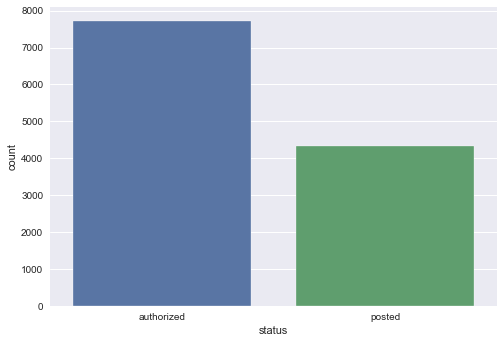

In [56]:
# Visualizing total number of authorized and posted transaction
sns.countplot(x="status",data=data)

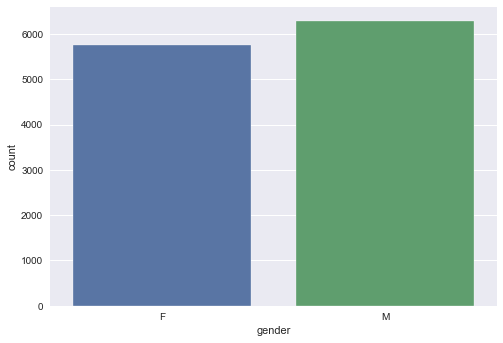

In [57]:
#Visualizing total number of Female and Male.
sns.countplot(x="gender",data=data)

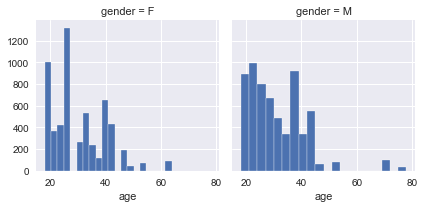

In [58]:
#Gridmap of gender and Age 
a = sns.FacetGrid(data, col='gender')
a.map(plt.hist, 'age', bins=20)

# Average Age

In [59]:
np.mean(data["age"])

30.5823299842232

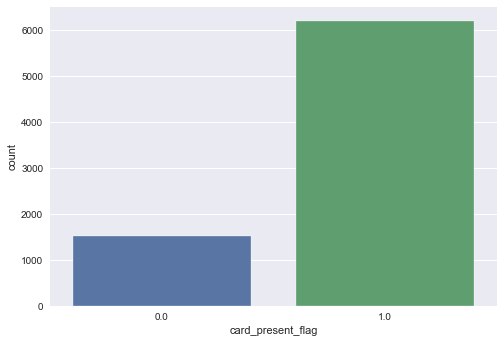

In [60]:
#countplot of card present flag
sns.countplot(x="card_present_flag",data=data)

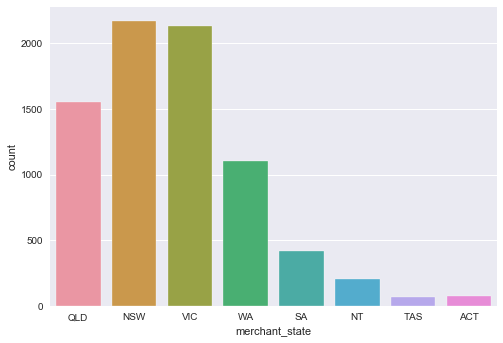

In [61]:
# Visualizing of merchant state
sns.countplot(x="merchant_state",data=data)

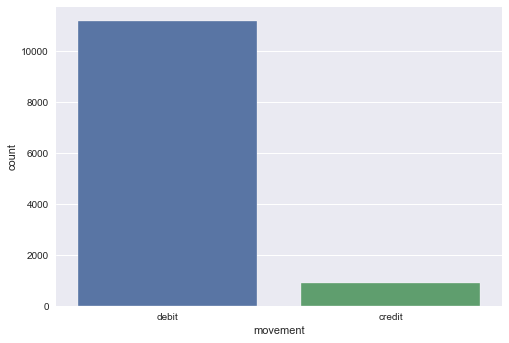

In [62]:
# Visualizing of movement
sns.countplot(x="movement",data=data)

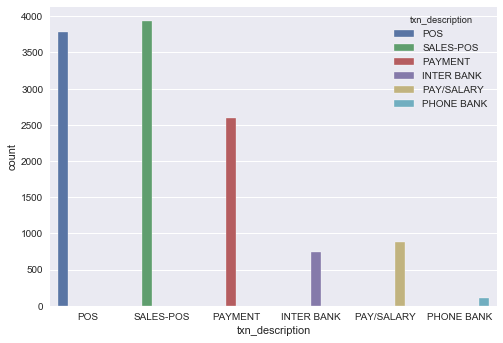

In [63]:
# Visualizing type transaction
sns.countplot(x="txn_description",hue="txn_description",data=data)

# Average  amount of transaction.

In [64]:
np.mean(data["amount"])

187.93358797641767

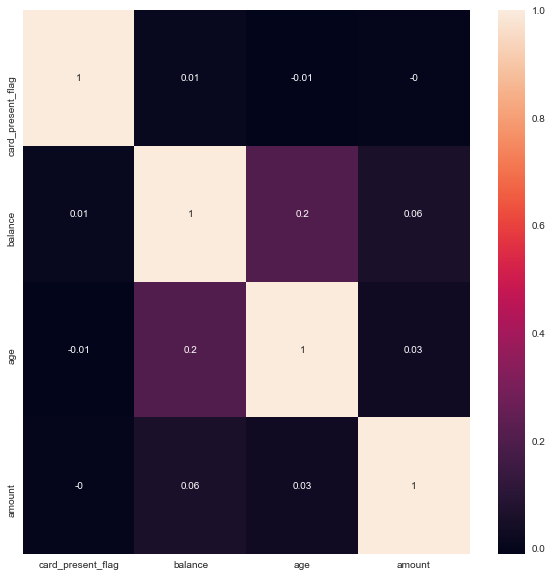

In [65]:
# Heatmap for checking correlation
correlation_matrix = data.corr().round(2)
plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix ,annot=True)

# Authorized transaction data

In [66]:
Authorized_df=data[data['status']=="authorized"]

In [67]:
Authorized_df.dtypes

status                       object
card_present_flag           float64
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

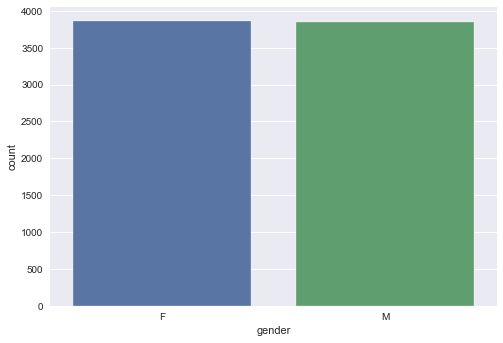

In [68]:
## Visualizing  female and male of authorized transaction.
sns.countplot(x="gender",data=Authorized_df)

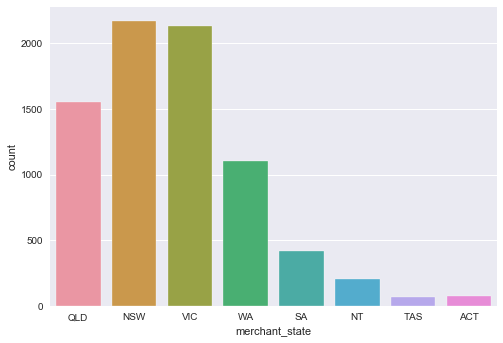

In [69]:
# Visualizing total number of authorized merchant state.
sns.countplot(x="merchant_state",data=Authorized_df)

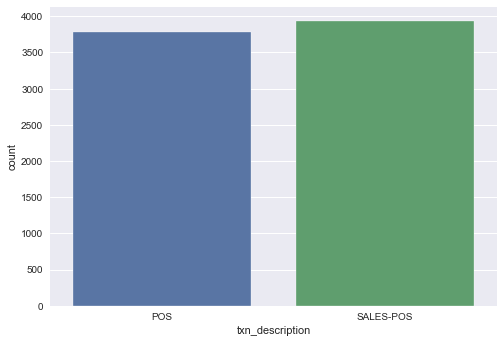

In [70]:
# Visualizing type of authorized transaction. 
sns.countplot(x="txn_description",data=Authorized_df)

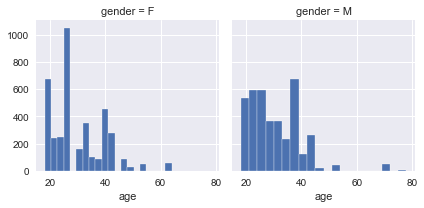

In [71]:
#Gridmap of gender and Age 
a = sns.FacetGrid(Authorized_df, col='gender')
a.map(plt.hist, 'age', bins=20)

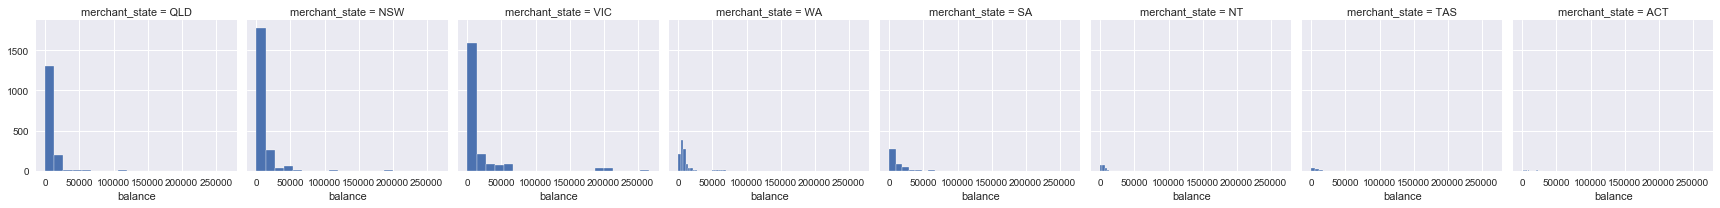

In [72]:
#Gridmap of merchant_state and balance
a = sns.FacetGrid(Authorized_df, col='merchant_state')
a.map(plt.hist, 'balance', bins=20)

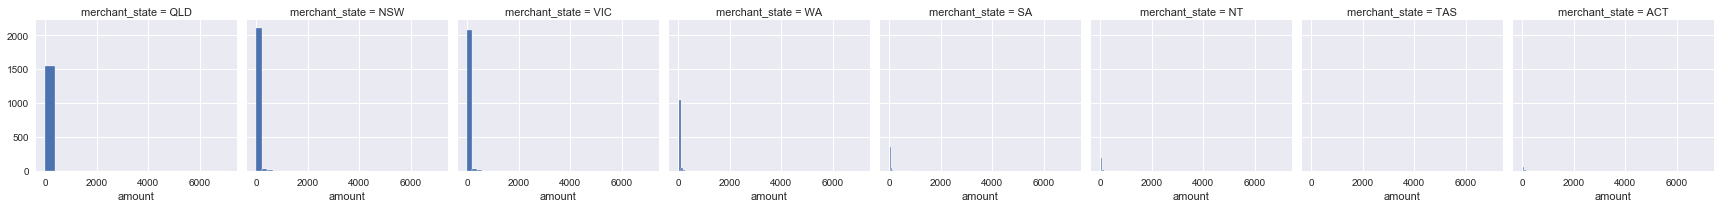

In [73]:
#Gridmap of merchant_state and amount
a = sns.FacetGrid(Authorized_df, col='merchant_state')
a.map(plt.hist, 'amount', bins=20)

# Max balance of authorized transaction.

In [74]:
max(Authorized_df["balance"])

267093.66

# Average amount authorized transaction

In [75]:
np.mean(Authorized_df["amount"])

40.153732020215195

# Posted transaction data

In [76]:
posted_data=data[data['status']=="posted"]
posted_data.drop(["card_present_flag","merchant_id","merchant_suburb","merchant_state","merchant_long_lat"],axis=1,inplace=True)

C:\Users\Pratik\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
posted_data.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,extraction,amount,transaction_id,country,customer_id,movement
5,posted,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,Robert,1705.43,2018-08-01,M,20,2018-08-01T02:00:00.000+0000,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,debit
9,posted,ACC-602667573,AUD,151.23 -33.96,INTER BANK,Michael,466.58,2018-08-01,M,40,2018-08-01T06:00:00.000+0000,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,debit
10,posted,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,Fernando,4348.50,2018-08-01,M,19,2018-08-01T06:00:00.000+0000,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,debit
11,posted,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,Kristin,1203.75,2018-08-01,F,43,2018-08-01T06:00:00.000+0000,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,debit
13,posted,ACC-588564840,AUD,151.27 -33.76,INTER BANK,Isaiah,4438.16,2018-08-01,M,23,2018-08-01T07:00:00.000+0000,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,debit


In [78]:
posted_data.isnull().sum()

status             0
account            0
currency           0
long_lat           0
txn_description    0
first_name         0
balance            0
date               0
gender             0
age                0
extraction         0
amount             0
transaction_id     0
country            0
customer_id        0
movement           0
dtype: int64

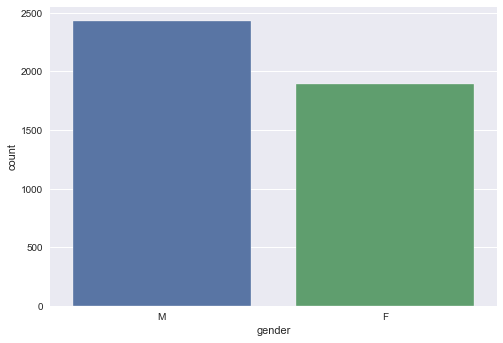

In [79]:
### Visualizing  female and male of posted transaction.
sns.countplot(x="gender",data=posted_data)

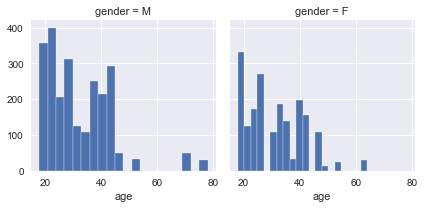

In [80]:
#Gridmap of gender and Age 
a = sns.FacetGrid(posted_data, col='gender')
a.map(plt.hist, 'age', bins=20)

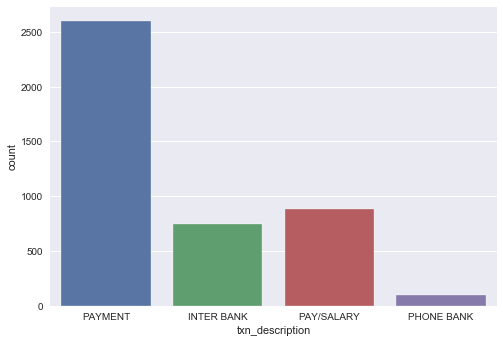

In [81]:
## Visualizing  tyep of posted transaction.
sns.countplot(x="txn_description",data=posted_data)

# Average amount of posted transaction

In [82]:
np.mean(posted_data["amount"])

451.55290106333774

# max balance in posted trancastion

In [83]:
max(posted_data['balance'])

267128.52

# Linear Regression

In [84]:

ldf=data[['age','balance']].copy()
ldf.head()

,age,balance
0,26,35.39
1,26,21.20
2,38,5.71
3,40,2117.22
4,26,17.95


In [85]:
#slicing
X=ldf.iloc[:,:-1].values
y=ldf.iloc[:,1].values
X
y

array([3.539000e+01, 2.120000e+01, 5.710000e+00, ..., 4.539457e+04,
       1.135067e+04, 5.517910e+03])

In [86]:
#spliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/3, random_state=0)   # 0 = true (randomaly split data) 

In [87]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# predicting the test set result
y_pred=regressor.predict(x_test)
y_pred

array([ 8440.47940041,  7800.26990077,  6519.85090149, ...,
       11001.31739898,  9080.68890005, 10361.10789934])

In [89]:
y_test

array([ 2162.15,  6820.47,  6353.98, ..., 12511.58, 10383.99,  5267.55])

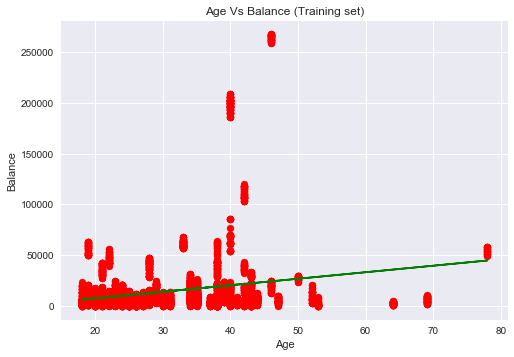

In [90]:
#visualising the training set results 
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='green')
plt.title('Age Vs Balance (Training set)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

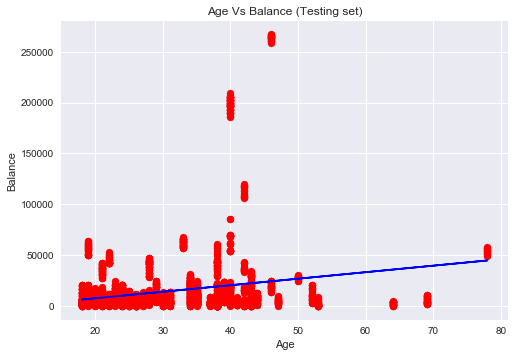

In [91]:
#visualising the testing set results 
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color="blue")
plt.title('Age Vs Balance (Testing set)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# Time series

In [92]:
data1=data[['date','amount']]
data1.index=data1['date']
data1.head()

,date,amount
date,,
2018-08-01,2018-08-01,16.25
2018-08-01,2018-08-01,14.19
2018-08-01,2018-08-01,6.42
2018-08-01,2018-08-01,40.90
2018-08-01,2018-08-01,3.25


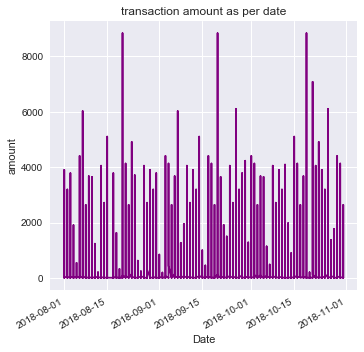

In [93]:
plt.figure(figsize=(5.5,5.5))
data1['amount'].plot(color='purple')
plt.title("transaction amount as per date")
plt.xlabel("Date")
plt.ylabel("amount")
plt.savefig("plot7.png",format='png',dpi=300)


In [94]:
daily=data1['amount'].resample('D')   # M = Month
daily_mean = daily.mean()
daily_mean.head()

date
2018-08-01    218.014161
2018-08-02    143.331053
2018-08-03    242.653376
2018-08-04     53.356356
2018-08-05     44.265000
Freq: D, Name: amount, dtype: float64

In [95]:
month=data1['amount'].resample('M')   # M = Month
month_mean = month.mean()
month_mean.head()

date
2018-08-31    185.121867
2018-09-30    182.045903
2018-10-31    196.427323
Freq: M, Name: amount, dtype: float64

In [96]:
week=data1['amount'].resample('W')   #w= week
week_mean = week.mean()
week_mean.head()

date
2018-08-05    151.315346
2018-08-12    191.737796
2018-08-19    180.216372
2018-08-26    189.795859
2018-09-02    162.706660
Freq: W-SUN, Name: amount, dtype: float64

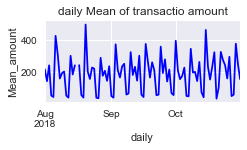

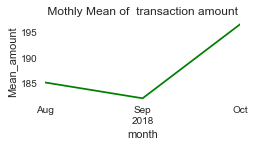

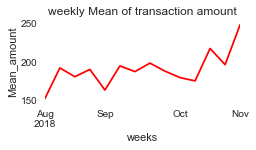

In [97]:
fig=plt.figure(figsize=(3.5,1.5))
ax=fig.add_subplot(1,1,1)
daily_mean.plot(ax=ax,color='b')
ax.set_title('daily Mean of transactio amount')
ax.set_xlabel("daily")
ax.set_ylabel('Mean_amount')
sns.set_style("ticks",{"axes.facecolor":"1."}) # for background color
plt.savefig("plo20.png",format='png',dpi=300)


fig=plt.figure(figsize=(3.5,1.5))
ax=fig.add_subplot(1,1,1)
month_mean.plot(ax=ax,color='g')
ax.set_title(' Mothly Mean of  transaction amount ')
ax.set_xlabel("month")
ax.set_ylabel('Mean_amount')
sns.set_style("ticks",{"axes.facecolor":"1."}) # for background color
plt.savefig("plo21.png",format='png',dpi=300)


fig=plt.figure(figsize=(3.5,1.5))
ax=fig.add_subplot(1,1,1)
week_mean.plot(ax=ax,color='r')
ax.set_title('weekly Mean of transaction amount')
ax.set_xlabel("weeks")
ax.set_ylabel('Mean_amount')
sns.set_style("ticks",{"axes.facecolor":"1."}) # for background color
plt.savefig("plo20.png",format='png',dpi=300)

In [98]:
#Splitting value of Latitude  and longitude for plotting in map

Merchant_Long = []
Merchant_Lat = []
for value in Authorized_df["merchant_long_lat"]:
    Merchant_Long.append(float(value.split()[0]))
    Merchant_Lat.append(float(value.split()[1]))

In [99]:
# Inserting values which are separated in Authorized_data
Authorized_df.insert(4,"Merchant_long",Merchant_Long,True)
Authorized_df.insert(5,"Merchant_lat",Merchant_Lat,True)

In [100]:
Authorized_df.head()

,status,card_present_flag,account,currency,Merchant_long,Merchant_lat,long_lat,txn_description,merchant_id,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.38,-27.99,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,151.21,-33.87,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.21,-33.87,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.05,-26.68,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.44,-28.06,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [101]:
# Creating a GeoDataFrame with points which we have to plot
crs = {'init':"epsg:4326"}
geometry = [Point(xy) for xy in zip(Authorized_df["Merchant_long"],Authorized_df["Merchant_lat"])]
geo_df = gpd.GeoDataFrame(Authorized_df,crs = crs ,geometry=geometry)

C:\Users\Pratik\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [102]:
# taking Map of Australia
Australia = gpd.read_file("States Map.shp")

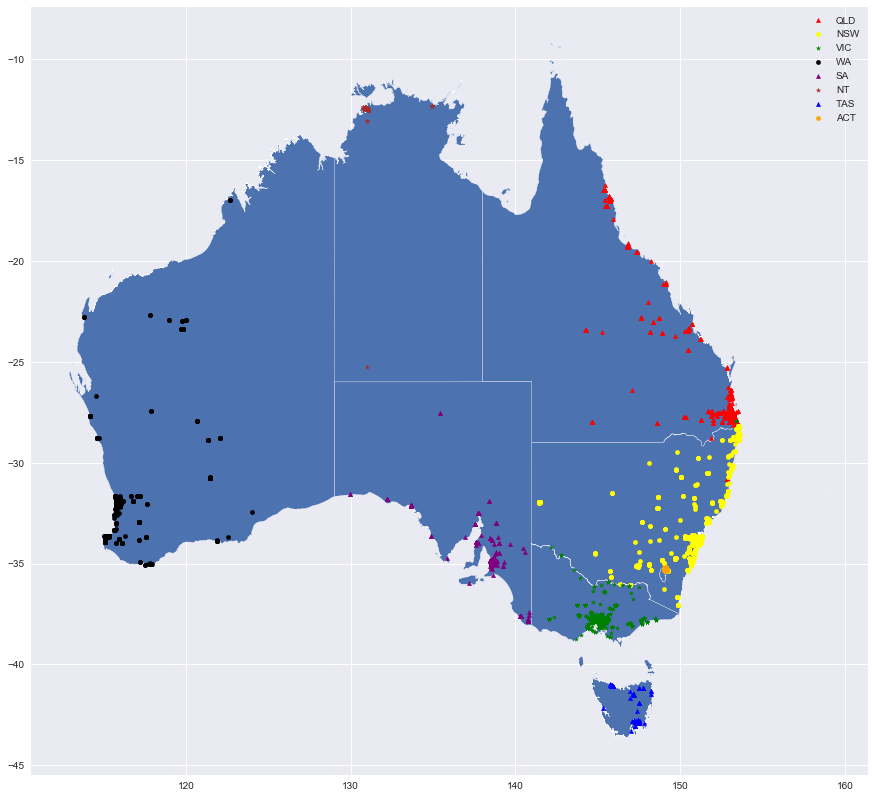

In [103]:
# Visualizing Map with Transactions made in states and locations
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (15,15))
Australia.plot(ax=ax)
geo_df[geo_df["merchant_state"] == "QLD"].plot(ax=ax,markersize = 20,color = "red",marker = "^",label="QLD")
geo_df[geo_df["merchant_state"] == "NSW"].plot(ax=ax,markersize = 20,color = "yellow",marker = "o",label="NSW")
geo_df[geo_df["merchant_state"] == "VIC"].plot(ax=ax,markersize = 20,color = "green",marker = "*",label="VIC")
geo_df[geo_df["merchant_state"] == "WA"].plot(ax=ax,markersize = 20,color = "black",marker = "o",label="WA")
geo_df[geo_df["merchant_state"] == "SA"].plot(ax=ax,markersize = 20,color = "purple",marker = "^",label="SA")
geo_df[geo_df["merchant_state"] == "NT"].plot(ax=ax,markersize = 20,color = "brown",marker = "*",label="NT")
geo_df[geo_df["merchant_state"] == "TAS"].plot(ax=ax,markersize = 20,color = "blue",marker = "^",label="TAS")
geo_df[geo_df["merchant_state"] == "ACT"].plot(ax=ax,markersize = 20,color = "orange",marker = "o",label="ACT")
plt.legend()
plt.show()